### 이미지 시각화

(30, 256, 256)
(256, 256)


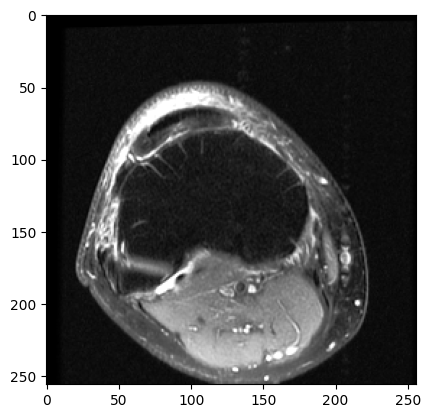

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

data = np.load("../MRNet-v1.0/train/axial/0001.npy")

print(data.shape)
print(data[0].shape)

plt.imshow(data[20], cmap="gray")
plt.show()

### 데이터 통계랑 EDA

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from glob import glob
from tqdm import tqdm

C:\Users\imash\AppData\Local\Temp\ipykernel_25248\3880639828.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


##### 파일 로드

In [4]:
IDs = glob(os.path.join('../MRNet-v1.0/train/axial','*.npy'))
IDs = [ID.split('\\')[-1].split(".")[0] for ID in IDs]
plane = ['axial', 'coronal', 'sagittal']
train = {}
valid = {}

In [5]:
for p in plane:
    file_name = glob(os.path.join('../MRNet-v1.0/train/', p ,'*.npy'))
    content = [np.load(f) for f in tqdm(file_name)]
    train[p] = content

for p in plane:
    file_name = glob(os.path.join('../MRNet-v1.0/valid/', p ,'*.npy'))
    content = [np.load(f) for f in tqdm(file_name)]
    valid[p] = content

  0%|          | 0/1130 [00:00<?, ?it/s]

100%|██████████| 120/120 [00:04<00:00, 26.93it/s]


In [6]:
names = ["Id","Result"]
train_abnormal = pd.read_csv('../MRNet-v1.0/train-abnormal.csv', header=None, names=names)
train_acl = pd.read_csv('../MRNet-v1.0/train-acl.csv', header=None, names=names)
train_meniscus = pd.read_csv('../MRNet-v1.0/train-meniscus.csv', header=None, names=names)
valid_abnormal = pd.read_csv('../MRNet-v1.0/valid-abnormal.csv', header=None, names=names)
valid_acl = pd.read_csv('../MRNet-v1.0/valid-acl.csv', header=None, names=names)
valid_meniscus = pd.read_csv('../MRNet-v1.0/valid-meniscus.csv', header=None, names=names)

##### 이미지 EDA

index(사람) : 
- 축별 사진 수
- 축별 평균, 표준 편차
- 전체 사진 수 
- 전체 이미지 평균, 표준 편차

In [7]:
train['axial'][0][0].min()


0

In [8]:
def make_eda_list(file_dict):
    eda_list = []
    for i in tqdm(range(len(file_dict['axial']))):
        tmp = {}
        axial = file_dict['axial'][i]
        coronal = file_dict['coronal'][i]
        sagittal = file_dict['sagittal'][i]

        tmp['ID'] = i+1
        tmp['axial_cnt'] = len(axial)
        tmp['axial_mean'] = np.mean(axial.mean(axis=(1,2)), axis=0)
        tmp['axial_std'] = np.mean(axial.std(axis=(1,2)), axis=0)
        
        tmp['coronal_cnt'] = len(coronal)
        tmp['coronal_mean'] = np.mean(coronal.mean(axis=(1,2)), axis=0)
        tmp['coronal_std'] = np.mean(coronal.std(axis=(1,2)), axis=0)
        
        tmp['sagittal_cnt'] = len(sagittal)
        tmp['sagittal_mean'] = np.mean(coronal.mean(axis=(1,2)), axis=0)
        tmp['sagittal_std'] = np.mean(coronal.std(axis=(1,2)), axis=0)
        
        tmp['total_cnt'] = tmp['axial_cnt'] + tmp['coronal_cnt'] + tmp['sagittal_cnt']
        tmp['total_mean'] = (tmp['axial_mean']*tmp['axial_cnt'] + tmp['coronal_cnt']*tmp['coronal_mean'] + tmp['sagittal_cnt']*tmp['sagittal_mean']) / tmp['total_cnt']
        tmp['total_std'] = (tmp['axial_std']*tmp['axial_cnt'] + tmp['coronal_cnt']*tmp['coronal_std'] + tmp['sagittal_cnt']*tmp['sagittal_std']) / tmp['total_cnt']
        eda_list.append(tmp)

    return eda_list

In [9]:
train_eda_df = pd.DataFrame(make_eda_list(train))
valid_eda_df = pd.DataFrame(make_eda_list(valid))

  0%|          | 0/1130 [00:00<?, ?it/s]

100%|██████████| 120/120 [00:28<00:00,  4.16it/s]


In [10]:
train_eda_df.describe()

,ID,axial_cnt,axial_mean,axial_std,coronal_cnt,coronal_mean,coronal_std,sagittal_cnt,sagittal_mean,sagittal_std,total_cnt,total_mean,total_std
count,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000
mean,565.500000,34.316814,63.209648,60.330058,29.777876,59.252354,62.450653,30.415929,59.252354,62.450653,94.510619,60.704571,61.657774
std,326.347208,7.546172,6.200916,2.427070,8.717150,5.076569,1.475462,6.962669,5.076569,1.475462,21.666250,4.766396,1.360679
min,1.000000,19.000000,44.628754,48.558438,17.000000,41.042642,57.139830,17.000000,41.042642,57.139830,55.000000,42.679780,55.606146
25%,283.250000,28.000000,58.848078,58.835143,21.000000,55.817980,61.439058,24.000000,55.817980,61.439058,74.000000,57.417794,60.841903
50%,565.500000,35.000000,63.201783,60.586071,30.000000,59.017461,62.427231,30.000000,59.017461,62.427231,96.000000,60.569415,61.719440
75%,847.750000,40.000000,67.302992,62.067237,36.000000,62.158768,63.364824,36.000000,62.158768,63.364824,112.000000,63.368441,62.561710
max,1130.000000,61.000000,83.496489,67.164274,58.000000,83.155749,67.437297,51.000000,83.155749,67.437297,162.000000,83.279655,67.089773


In [11]:
valid_eda_df.describe()

,ID,axial_cnt,axial_mean,axial_std,coronal_cnt,coronal_mean,coronal_std,sagittal_cnt,sagittal_mean,sagittal_std,total_cnt,total_mean,total_std
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,60.500000,34.316667,63.787014,60.462002,29.425000,59.279914,62.431240,30.525000,59.279914,62.431240,94.266667,60.916018,61.688510
std,34.785054,7.154928,6.073908,2.312808,8.386326,4.824425,1.549899,6.373478,4.824425,1.549899,20.544166,4.638982,1.402827
min,1.000000,20.000000,42.196460,48.431948,17.000000,37.564653,56.393941,21.000000,37.564653,56.393941,59.000000,39.605788,52.885266
25%,30.750000,28.000000,60.144588,59.160706,21.000000,56.166440,61.543788,24.000000,56.166440,61.543788,74.000000,58.271856,60.916328
50%,60.500000,34.000000,64.013429,60.915117,30.000000,59.296003,62.424605,30.000000,59.296003,62.424605,95.000000,61.381198,61.844616
75%,90.250000,40.000000,67.852389,61.939577,36.000000,61.781480,63.396701,35.000000,61.781480,63.396701,113.000000,63.745569,62.490957
max,120.000000,52.000000,80.230642,64.815214,48.000000,77.713569,66.318513,45.000000,77.713569,66.318513,139.000000,78.624000,64.351422


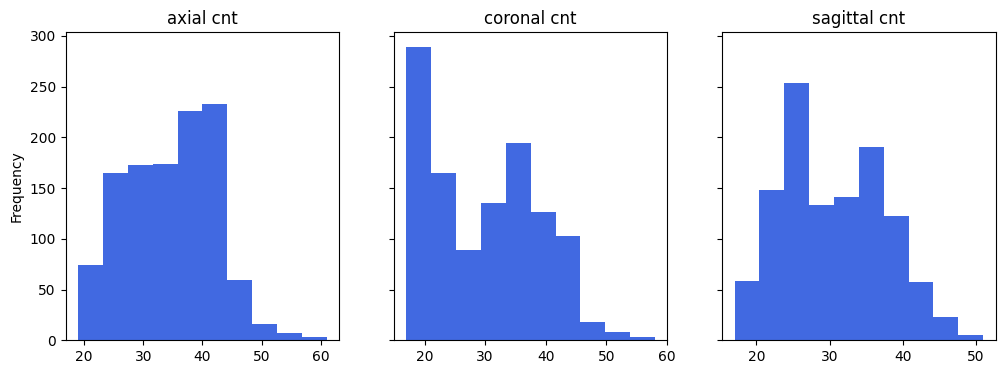

In [12]:
plt.figure(figsize=(12, 4))

ax1 = plt.subplot(1,3,1)
train_eda_df.axial_cnt.plot(kind = 'hist', color = 'royalblue')
plt.title("axial cnt")

plt.subplot(1,3,2, sharey = ax1)
train_eda_df.coronal_cnt.plot(kind = 'hist', color = 'royalblue')
plt.title("coronal cnt")

plt.subplot(1,3,3, sharey = ax1)
train_eda_df.sagittal_cnt.plot(kind = 'hist', color = 'royalblue')
plt.title("sagittal cnt")

# plt.tight_layout()
plt.show()

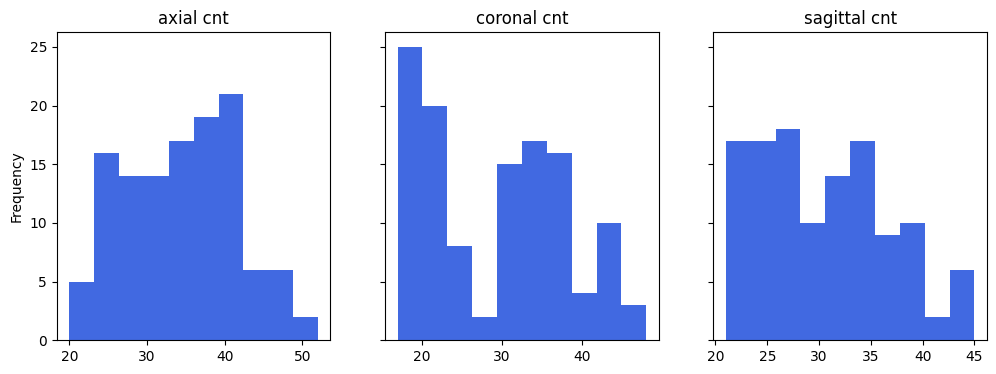

In [13]:
plt.figure(figsize=(12, 4))

ax1 = plt.subplot(1,3,1)
valid_eda_df.axial_cnt.plot(kind = 'hist', color = 'royalblue')
plt.title("axial cnt")

plt.subplot(1,3,2, sharey = ax1)
valid_eda_df.coronal_cnt.plot(kind = 'hist', color = 'royalblue')
plt.title("coronal cnt")

plt.subplot(1,3,3, sharey = ax1)
valid_eda_df.sagittal_cnt.plot(kind = 'hist', color = 'royalblue')
plt.title("sagittal cnt")

# plt.tight_layout()
plt.show()

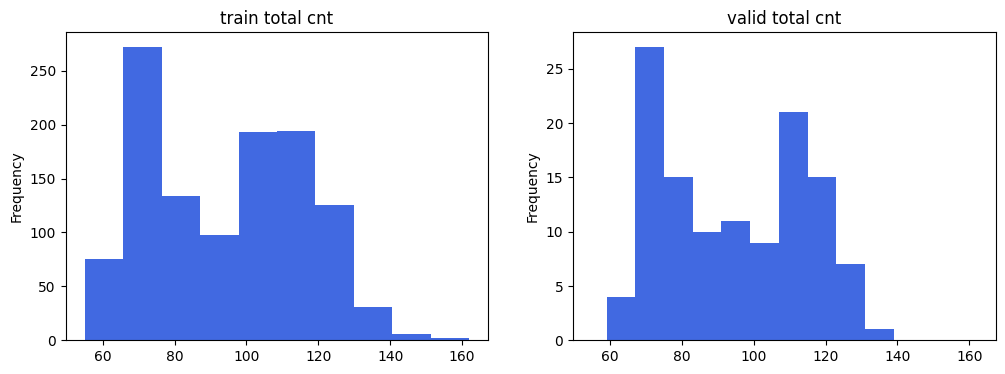

In [14]:
plt.figure(figsize=(12, 4))

ax1 = plt.subplot(1,2,1)
train_eda_df.total_cnt.plot(kind = 'hist', color = 'royalblue')
plt.title("train total cnt")

plt.subplot(1,2,2, sharex = ax1)
valid_eda_df.total_cnt.plot(kind = 'hist', color = 'royalblue')
plt.title("valid total cnt")

# plt.tight_layout()
plt.show()

##### CSV EDA

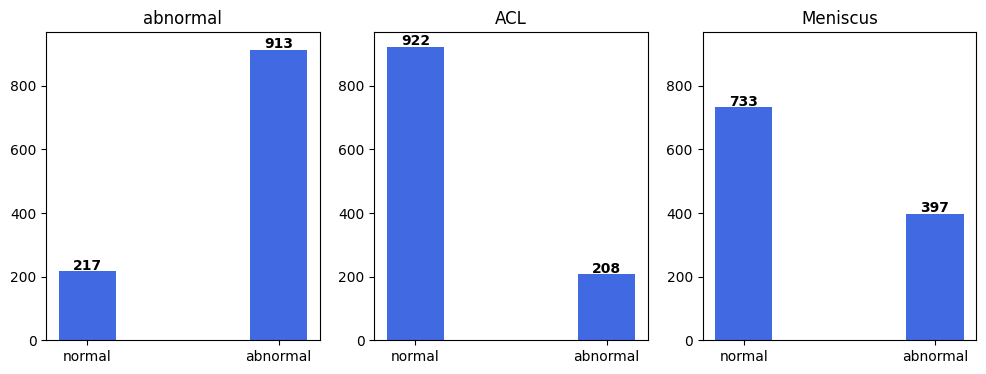

In [15]:
res = ['normal', 'abnormal']
plt.figure(figsize=(12, 4))

ax1 = plt.subplot(1,3,1)
values = train_abnormal.Result.value_counts().sort_index()
plt.bar(values.index, values, width=0.3, color='royalblue')
plt.xticks(values.index, res)
plt.title("abnormal")
for idx, value in zip(values.index, values):
    plt.text(idx, value+5, s=value, #텍스트 추가
            ha='center',
            fontweight='bold'
        )

plt.subplot(1,3,2, sharex = ax1, sharey = ax1)
values = train_acl.Result.value_counts().sort_index()
plt.bar(values.index, values, width=0.3, color='royalblue')
plt.title("ACL")
for idx, value in zip(values.index, values):
    plt.text(idx, value+5, s=value, #텍스트 추가
            ha='center',
            fontweight='bold'
        )

plt.subplot(1,3,3, sharex = ax1, sharey = ax1)
values = train_meniscus.Result.value_counts().sort_index()
plt.bar(values.index, values, width=0.3, color='royalblue')
plt.title("Meniscus")
for idx, value in zip(values.index, values):
    plt.text(idx, value+5, s=value, #텍스트 추가
            ha='center',
            fontweight='bold'
        )

plt.show()


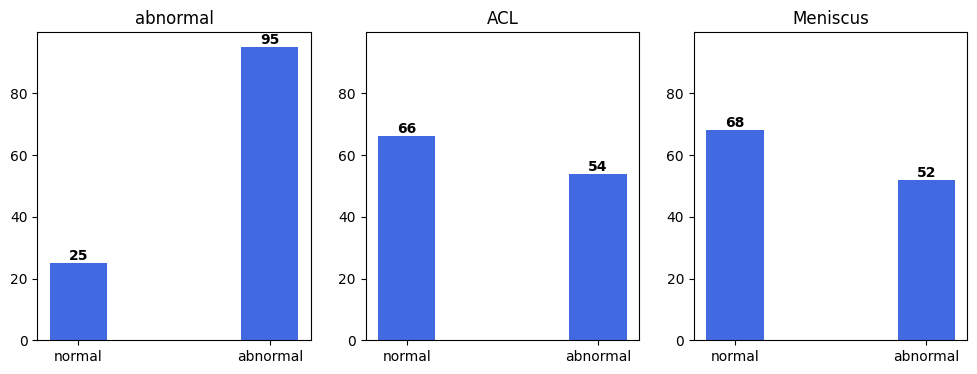

In [16]:
res = ['normal', 'abnormal']
plt.figure(figsize=(12, 4))

ax1 = plt.subplot(1,3,1)
values = valid_abnormal.Result.value_counts().sort_index()
plt.bar(values.index, values, width=0.3, color='royalblue')
plt.xticks(values.index, res)
plt.title("abnormal")
for idx, value in zip(values.index, values):
    plt.text(idx, value+1, s=value, #텍스트 추가
            ha='center',
            fontweight='bold'
        )

plt.subplot(1,3,2, sharex = ax1, sharey = ax1)
values = valid_acl.Result.value_counts().sort_index()
plt.bar(values.index, values, width=0.3, color='royalblue')
plt.title("ACL")
for idx, value in zip(values.index, values):
    plt.text(idx, value+1, s=value, #텍스트 추가
            ha='center',
            fontweight='bold'
        )

plt.subplot(1,3,3, sharex = ax1, sharey = ax1)
values = valid_meniscus.Result.value_counts().sort_index()
plt.bar(values.index, values, width=0.3, color='royalblue')
plt.title("Meniscus")
for idx, value in zip(values.index, values):
    plt.text(idx, value+1, s=value, #텍스트 추가
            ha='center',
            fontweight='bold'
        )

plt.show()

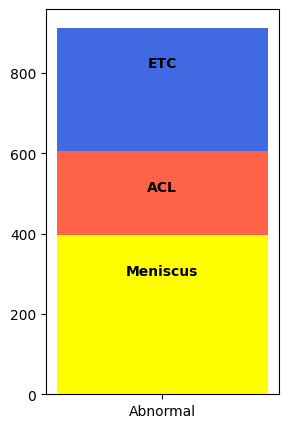

In [17]:
plt.figure(figsize=(3,5))

value = train_abnormal.Result.value_counts()[1]
plt.bar("Abnormal", value, width=0.1, color='royalblue')
plt.text("Abnormal", value- 100, s="ETC", ha='center',fontweight='bold')
value1 = train_acl.Result.value_counts()[1]
value2 = train_meniscus.Result.value_counts()[1]
plt.bar("Abnormal", value1 + value2, width=0.1, color='tomato') #ACL
plt.text("Abnormal", value1 + value2 - 100, s="ACL", ha='center',fontweight='bold')
plt.bar("Abnormal", value2, width=0.1, color='Yellow') #menisucus
plt.text("Abnormal", value2- 100, s="Meniscus", ha='center',fontweight='bold')

plt.show()